In [2]:
import os, sys
PROJ_DIR = os.path.expanduser("~/projects/a-reproducible-research-workflow")
RESULTS_DIR = os.path.join(PROJ_DIR, "results", "exp_1")

In [3]:
import torch

import pandas as pd

from matplotlib import pyplot as plt
plt.style.use("bmh")
plt.xkcd()

In [4]:
def collect_results():
    df = pd.DataFrame(columns=["Learning rate", "Batch size", "Accuracy"])

    for (i, name) in enumerate(os.listdir(RESULTS_DIR)):
        hps = torch.load(os.path.join(RESULTS_DIR, name, "hps.pt"))
        metrics = torch.load(os.path.join(RESULTS_DIR, name, "metrics.pt"))
        df.loc[name] = [
            hps.lr, hps.batch_size, metrics["accuracy"]
        ]

    return df

if __name__ == "__main__":
    df = collect_results()
    print(df)

                      Learning rate  Batch size  Accuracy
dulcet-universe-35            0.001        60.0  0.082306
helpful-feather-59            0.001        80.0  0.008543
absurd-blaze-61               1.000        40.0  0.823577
ruby-salad-33                 0.100        40.0  0.090625
dark-wood-57                  0.100        40.0  0.377876
chocolate-eon-42              1.000        80.0  0.688967
golden-star-62                0.010        80.0  0.575267
vague-spaceship-55            1.000        60.0  0.250317
snowy-tree-66                 1.000       100.0  0.744700
mild-field-50                 0.001        20.0  0.679537
stellar-pyramid-41            0.100        80.0  0.071044
classic-gorge-62              0.001        60.0  0.783363
polar-dawn-66                 0.010        60.0  0.509556
sage-brook-62                 0.100       100.0  0.206006
happy-violet-31               0.001        40.0  0.007889
restful-meadow-58             0.010       100.0  0.426971
fine-cosmos-44

In [5]:
def process_df(df):
    return df.groupby(['Learning rate'])["Accuracy"].mean().reset_index()

# For LaTeX
#print(process_df(df).to_latex(float_format="%#.3g"))

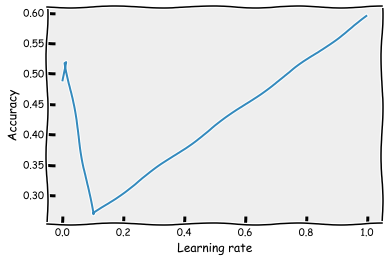

In [8]:
def make_plot(df):
    df_processed = process_df(df)
    
    fig, ax = plt.subplots()
    ax.plot(df_processed['Learning rate'], df_processed["Accuracy"])
    ax.set_xlabel("Learning rate")
    ax.set_ylabel("Accuracy")

    return fig

if __name__ == "__main__":
    make_plot(df)

You can convert the notebook to an executable script in the end after tuning.
- You can't use `-` if you want to import it later.